<a href="https://colab.research.google.com/github/taianers/inteligencia-artificial-gcc128/blob/master/quiz_01_simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 01 - O problema da Mochila
## ***GCC128 - Inteligência Artificial***

Profº Eric Fernandes de Mello Araújo

Nome: Taiane Rodrigues de Sousa

# O problema da mochila

O problema da mochila, também conhecido como "knapsack problem" em inglês, é um problema clássico de otimização combinatória. Ele envolve decidir quais itens selecionar de um conjunto, considerando seus valores e pesos, para maximizar o valor total sem exceder uma capacidade de peso pré-determinada. 

O problema é comumente formulado da seguinte maneira:

Dado um conjunto de itens, cada um com um valor e um peso, e uma capacidade máxima da mochila, o objetivo é determinar a combinação de itens que maximize o valor total, respeitando a restrição de capacidade.

### Problema da Mochila 0-1

Nesta atividade é implementado o Problema da Mochila 0-1, onde cada item só pode ser selecionado uma vez ou não selecionado. Isso significa que ou você coloca o item inteiro na mochila, ou não o coloca.

## Sobre a solução

Para resolver este problema será utilizado o algoritmo Simulated Annealing. Trata-se de um algoritmo de otimização que busca soluções aproximadas para problemas complexos. Inspirado no processo de recozimento de materiais, o algoritmo faz pequenas alterações em uma solução inicial e aceita soluções piores com uma probabilidade controlada pela temperatura. À medida que a temperatura diminui, a busca se concentra em soluções melhores. O Simulated Annealing é eficaz para escapar de mínimos locais e explorar o espaço de busca de forma eficiente.

#### Bibliotecas utilizadas

O comando abaixo é utilizado para instalarmos a biblioteca Matplotlib para que seja possível gerarmos os gráficos da solução.

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importações necessárias

Neste primeiro trecho são adicionadas as importações necessárias: 
- random é utlizada para gerar números aleatórios;
- math é utilizada para realizar operações matemáticas;
- matplotlib.pyplot é utilizada para plotagem dos gráficos.

E definidos os parâmetros do Simulated Annealing:

- Temperatura inicial;
- Temperatura final;
- Taxa de resfriamento;
- Número de iterações.




In [ ]:
import random
import math
import matplotlib.pyplot as plt

temp_ini = 100
temp_fim = 0.1
taxa_resfriamento = 0.95
num_iteracoes = 1500

#### Função de inicialização

Responsável por gerar aleatoriamente alguns itens a serem colocados na mochila e determina a capacidade máxima da mesma de acordo com a quantidade de itens, onde cada item é representado por um par (peso, valor).

In [ ]:
def inicializacao(qtd_itens):
  itens = []
  for _ in range(qtd_itens):
    peso = random.randint(1, 10)
    valor = random.randint(1, 10)
    itens.append((peso, valor))
  capacidade_max = random.randint(qtd_itens*2, qtd_itens*5)
  return itens, capacidade_max

#### Função de avaliação

Calcula o valor total da mochila com base nos itens
selecionados e verifica se o peso total dos itens selecionados não excede a capacidade máxima da mochila. Caso isso ocorra, a solução é considerada inválida e retorna o valor 0.

In [ ]:
def avaliacao(solucao, itens, capacidade_max):
  valor_total = 0
  peso_total = 0
  for i in range(len(solucao)):
    if solucao[i] == 1:
      valor_total += itens[i][1]
      peso_total += itens[i][0]
  if peso_total > capacidade_max:
    return 0
  else:
    return valor_total

#### Função de solução inicial

Gera uma solução aleatória representada por uma lista de valores binários (0 ou 1), indicando se cada item é selecionado para a mochila ou não.

In [ ]:
def solucao_inicial(qtd_itens):
  return [random.randint(0, 1) for _ in range(qtd_itens)]

#### Função de solução vizinha

Faz uma pequena alteração na solução atual invertendo o valor binário do item selecionado.

In [ ]:
def solucao_vizinha(solucao):
  solucao_vizinha = solucao.copy()
  i = random.randint(0, len(solucao)-1)
  solucao_vizinha[i] = 1 - solucao_vizinha[i]
  return solucao_vizinha

#### Função de plotagem de gráficos

É chamada ao final da execução do algoritmo para exibir os gráficos com os resultados. Ela gera a visualização do gráfico de evolução do erro com as iterações e do gráfico da evolução da temperatura com as iterações nos mostrando o comportamento do algoritmo durante a busca.

In [ ]:
def plotagem_graficos(iteracoes, erros_iteracao, temperaturas):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(iteracoes, erros_iteracao)
    plt.xlabel('Iterações')
    plt.ylabel('Erro (diferença de valor)')
    plt.title('Evolução do erro com as iterações')

    plt.subplot(1, 2, 2)
    plt.plot(iteracoes, temperaturas)
    plt.xlabel('Iterações')
    plt.ylabel('Temperatura')
    plt.title('Evolução da temperatura com as iterações')

    plt.tight_layout()
    plt.show()

#### Função Simulated Annealing

Essa função possui o laço principal do algoritmo para encontrar uma solução ótima ou aproximadamente ótima para o problema da mochila. Ela inicia a solução atual como a solução inicial gerada, e também cria uma cópia dessa solução como a melhor solução encontrada até o momento. A temperatura atual é configurada como a temperatura inicial e são inicializadas as variáveis de iteração, as listas para registro dos erros, temperaturas e iterações.

Dentro do loop, enquanto a temperatura atual for maior que a temperatura final e o número de iterações não exceder o limite definido, o algoritmo continua a busca por soluções melhores. A cada iteração, uma nova solução vizinha é gerada, e os valores das soluções atual e vizinha são avaliados.

O erro é calculado como a diferença absoluta entre o valor da solução vizinha e o valor da solução atual. Se a solução vizinha for melhor (valor maior) ou se a probabilidade de aceitação for maior do que um número aleatório entre 0 e 1, a solução atual é atualizada para a solução vizinha. Além disso, se a solução vizinha for melhor do que a melhor solução encontrada até o momento, a melhor solução também é atualizada.

A temperatura atual é reduzida multiplicando-a pela taxa de resfriamento. Em seguida atualiza os registros de erro, temperatura e iteração.

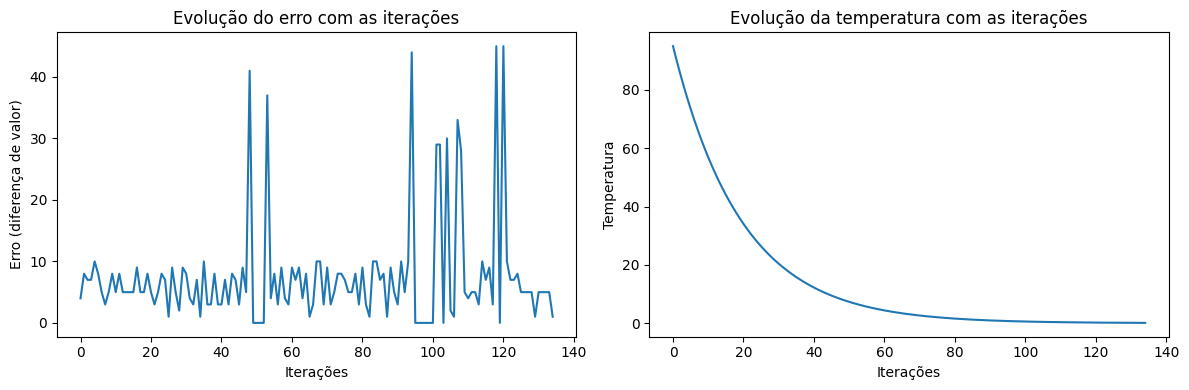

Melhor solução encontrada: [1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
Valor da mochila: 45


In [ ]:
def simulated_annealing(itens, capacidade_max):
    qtd_itens = len(itens)
    solucao_atual = solucao_inicial(qtd_itens)
    melhor_solucao = solucao_atual.copy()
    temp_atual = temp_ini
    iteracao = 0
    erros_iteracao = []
    temperaturas = []
    iteracoes = []

    while temp_atual > temp_fim and iteracao < num_iteracoes:
        # Gera uma nova solução vizinha
        vizinha = solucao_vizinha(solucao_atual)

        # Calcula o valor da nova solução vizinha
        valor_atual = avaliacao(solucao_atual, itens, capacidade_max)
        valor_vizinho = avaliacao(vizinha, itens, capacidade_max)

        # Calcula o erro (diferença de valor)
        erro = abs(valor_vizinho - valor_atual)

        # Verifica se a nova solução vizinha é melhor ou se deve ser aceita com uma probabilidade
        if valor_vizinho > valor_atual or math.exp(erro / temp_atual) > random.uniform(0, 1):
            solucao_atual = vizinha.copy()
            if valor_vizinho > avaliacao(melhor_solucao, itens, capacidade_max):
                melhor_solucao = vizinha.copy()

        # Atualiza a temperatura
        temp_atual *= taxa_resfriamento

        # Atualiza os registros de erro, temperatura e iteração
        erros_iteracao.append(erro)
        temperaturas.append(temp_atual)
        iteracoes.append(iteracao)

        iteracao += 1
    
    # Exibe os resultados em gráficos
    plotagem_graficos(iteracoes, erros_iteracao, temperaturas)

    return melhor_solucao, avaliacao(melhor_solucao, itens, capacidade_max)

# Gera entradas aleatórias
itens, capacidade_max = inicializacao(10)

# Executa o algoritmo para obter a melhor solução
melhor_solucao, valor_mochila = simulated_annealing(itens, capacidade_max)

# Imprime a melhor solução encontrada
print("Melhor solução encontrada:", melhor_solucao)
print("Valor da mochila:", valor_mochila)


#### Considerações finais

O código finaliza exibindo a melhor solução encontrada e o valor da mochila após a execução do algoritmo Simulated Annealing. Esses valores representam a melhor combinação de itens e o valor máximo que pode ser obtido respeitando as restrições de capacidade da mochila. Dessa forma, essa solução nos permite compreender o funcionamento do algoritmo Simulated Annealing para resolver o Problema da Mochila.